<a href="https://colab.research.google.com/github/syafri113/study-case-eda03/blob/main/Studi_Kasus_3_Kelompok_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kelompok 12 
Heny Nur Afifah	(11210940000024)

Regita Cahyaningsih	(11210940000046)

Robby Zainy Rusyd	(11210940000047)

Syifa Ghaisani 	(11210940000050)

Muhammad Saeful Anwar (11210940000061)

Dewi Arthasari Prescelya (11210940000066)

Muhammad Syafri Nuryanto (11210940000079)

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import numpy as np
from collections import Counter
matplotlib.rcParams['figure.dpi'] = 100
sns.set()
%matplotlib inline
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bekasi.csv
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bogor.csv
!wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/jakarta.csv
dfB = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
dfb = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')

mkdir: cannot create directory ‘data’: File exists
--2022-10-26 05:13:20--  https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bekasi.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72106 (70K) [text/plain]
Saving to: ‘data/bekasi.csv.2’

bekasi.csv.2        100%[===================>]  70.42K  --.-KB/s    in 0.001s  

2022-10-26 05:13:20 (69.1 MB/s) - ‘data/bekasi.csv.2’ saved [72106/72106]

--2022-10-26 05:13:20--  https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bogor.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443...

In [2]:
dfB = dfB.iloc[0:107]
dfB = dfB[['created_at', 'LT','LB','KT','KM','garasi','carport','lokasi','sertifikat','listrik','hadap','harga']]
dfB

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08


In [3]:
#Mengubah tipe data supaya dapat dibaca oleh Python
dfB['LT'] = dfB['LT'].astype('float64')
dfB['garasi'] = dfB['garasi'].astype('category')
dfB['carport'] = dfB['carport'].astype('category')
dfB['lokasi'] = dfB['lokasi'].astype('category')
dfB['sertifikat'] = dfB['sertifikat'].astype('category')
dfB['hadap'] = dfB['hadap'].astype('category')
dfB.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi        category
carport       category
lokasi        category
sertifikat    category
listrik        float64
hadap         category
harga          float64
dtype: object

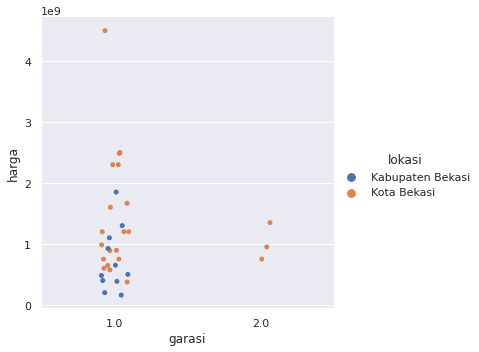

In [4]:
v1 = sns.catplot(x="garasi", y="harga", hue="lokasi" ,data=dfB)

##Interpretasi
Berdasarkan analisis yang telah kami lakukan dapat divisualisasikan seperti pada gambar di atas. Dapat dilihat bahwa Rumah yang memiliki garasi 1 di Kota Bekasi lebih banyak unit nya dibandingkan dengan rumah yang berada di Kabupaten Bekasi. Namun, unit rumah di Kabupaten Bekasi memiliki harga yang cenderung lebih murah. Hal itu mungkin saja disebabkan oleh beberapa fakor, diantaranya :
1. Perbedaan antara kabupaten dengan kota
2. Letak lokasi rumah di Kabupaten Bekasi kurang strategis
3. Letak rumah yang berada di dataran rendah sehingga pada musim hujan  memungkinkan terjadinya banjir
4. Jumlah kamar cenderung lebih sedikit.

Namun rumah yg memiliki garasi 2 hanya terdapat di kota bekasi yang cenderung berada di harga rata-rata. Mungkin saja dikarenakan penjual sedang membutuhkan dana cepat sehingga tidak memberikan harga yang cenderung lebih tinggi.

Kami menyarankan untuk perusahaan menghubungi penjual rumah dengan garasi 2 dan harga yang cenderung lebih murah dibandingkan dengan yang lainnya, karena rumah tersebut memiliki garasi yang lebih banyak dan lokasi yang lebih stategis

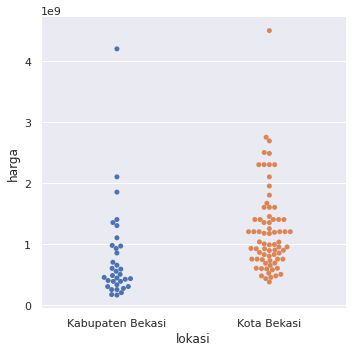

In [5]:
v1B = sns.catplot(x="lokasi", y="harga", kind="swarm",data=dfB)

#Interpretasi
Berdasarkan analisis yang telah kami lakukan dapat divisualisasikan seperti pada gambar di atas. Didapat hasil bahwa Kota Bekasi memiliki jumlah unit rumah yang lebih banyak dibandingkan dengan Kabupaten Bekasi. Namun, harga yang cenderung lebih murah banyak terdapat di daerah Kabupaten Bekasi. 

Kami menyarankan untuk perusahaan menghubungi penjual yang berada di Kota Bekasi dengan harga yang cenderung lebih murah dibandingkan dengan unit lain. Karena unit tersebut mungkin memiliki banyak keutamaan bagi perusahaan salah satunya lokasi yang strategis.

In [6]:
dfb = dfb.iloc[0:193]
dfb = dfb[['created_at', 'LT','LB','KT','KM','garasi','carport','lokasi','sertifikat','listrik','hadap','harga']]
dfb

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
188,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Gunung Putri,SHM,1300.0,NaN,4.405500e+08
189,03-12-2021,107.0,31.0,2.0,1.0,0.0,1.0,Sukaraja,SHM,1300.0,NaN,4.086500e+08
190,03-12-2021,210.0,150.0,4.0,2.0,1.0,1.0,Bogor Selatan,SHM,2200.0,NaN,1.200000e+09
191,03-12-2021,90.0,36.0,2.0,1.0,0.0,1.0,Cileungsi,SHM,1300.0,NaN,4.405500e+08


In [7]:
#Mengubah tipe data supaya dapat dibaca oleh Python
dfb['LT'] = dfb['LT'].astype('float64')
dfb['garasi'] = dfb['garasi'].astype('category')
dfb['carport'] = dfb['carport'].astype('category')
dfb['lokasi'] = dfb['lokasi'].astype('category')
dfb['sertifikat'] = dfb['sertifikat'].astype('category')
dfb['hadap'] = dfb['hadap'].astype('category')
dfb.dtypes

created_at      object
LT             float64
LB             float64
KT             float64
KM             float64
garasi        category
carport       category
lokasi        category
sertifikat    category
listrik        float64
hadap         category
harga          float64
dtype: object

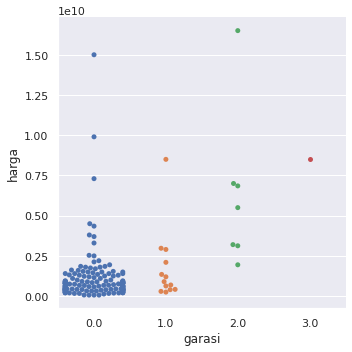

In [8]:
v2 = sns.catplot(x="garasi", y="harga",kind="swarm", data=dfb)

##Interpretasi
Berdasarkan analisis kami:
- Ketika tidak ada garasi, rumah cenderung diminati. Hanya saja, harga rumah dalam kategori tersebut cenderung lebih rendah ketimbang kategori rumah dengan garasi. Sehingga, apabila perusahaan ingin rumah cepat terjual, perusahaan dapat menjual rumah dengan tanpa garasi.
- Rumah dengan 3 garasi, cenderung kurang diminati. Sehingga, tidak disarankan bagi perusahaan untuk menjual rumah dengan 3 garasi karena dirasa tidak menguntungkan.
- Rumah dengan 2 garasi memiliki range harga yang cenderung lebih tinggi dan pada kategori ini ada rumah dengan nilai jual tertinggi ketimbang kategori garasi lainnya. Jadi, apabila perusahaan ingin berinvestasi pada rumah dengan harga yang tinggi, pilihan rumah bergarasi 2 dapat menjadi pilihan yang cocok.

In [9]:
dfJ = dfJ.iloc[0:121]
dfJ = dfJ[['created_at', 'LT','LB','KT','KM','garasi','carport','lokasi','sertifikat','listrik','hadap','harga']]
dfJ

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
116,22-11-2021,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,NaN,3.850000e+09
117,06-12-2021,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,NaN,8.800000e+08
118,06-12-2021,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,Timur,4.300000e+09
119,06-12-2021,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,Selatan,3.400000e+09


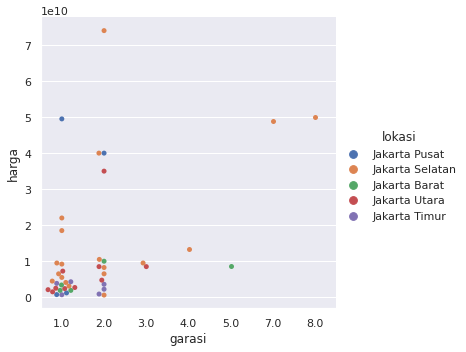

In [10]:
v3 = sns.catplot(x="garasi", y="harga",hue='lokasi',kind="swarm", data=dfJ)

# Interpretasi
Berdasarkan analisis yang telah kami lakukan dapat divisualisasikan seperti pada gambar diatas. dapat dilihat bahwa rumah wilayah Jakarta Selatan adalah yang paling banyak memiliki garasi dibandingkan dengan wilayah lainnya, dan rata-rata unit rumah di wilayah Jakarta Selatan memiliki satu garasi. 
diwilayah Jakarta Selatan terdapat rumah yang memiliki dua garasi  dengan harga yang tertingg dibandingkan dengan wilayah lainnya, meskipun terdapat unit rumah di wilayah Jakarta Selatan yang memiliki 8 garasi namun harga unit rumah yang memiliki 2 garasi di wilayah Jakarta Selatan tetap memiliki harga termahal.
terdapat rumah diwilayah Jakarta Selatan yang memiliki 8 garasi dikarenakan wilayah Jakarta Selatan termasuk lingkungan yang elit.

Rumah di wilayah Jakarta barat memiliki jumlah garasi paling sedikit, menurut kami hal tersebut memungkinkan karena wilayah Jakarta barat termasuk wilayah yang padat penduduk dan tidak memiliki banyak lahan kosong.

Berdasarkan gambar dari seluruh wilayah dari Jakarta pusat, Jakarta Selatan, Jakarta barat, Jakarta Utara, dan Jakarta timur memiliki kesamaan pada jumlah garasi yaitu 1 unit garasi.